# 7. Share the Insight


> “The goal is to turn data into insight”
  
- Why do we need to communicate insight?
- Types of communication - Exploration vs. Explanation
- Explanation: Telling a story with data
- Exploration: Building an interface for people to find stories

There are two main insights we want to communicate. 
- Bangalore is the largest market for Onion Arrivals. 
- Onion Price variation has increased in the recent years.

Let us explore how we can communicate these insight visually.

## Preprocessing to get the data

In [1]:
# Import the library we need, which is Pandas and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

In [2]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

In [4]:
# Change the index to the date column
df.index = pd.PeriodIndex(df.date, freq='M')

In [5]:
# Sort the data frame by date
df = df.sort_values(by = "date")

In [6]:
# Get the data for year 2016
df2016 = df[df.year == 2016]

In [7]:
# Groupby on City to get the sum of quantity
df2016City = df2016.groupby(['city'], as_index=False)['quantity'].sum()

In [8]:
df2016City = df2016City.sort_values(by = "quantity", ascending = False)

In [10]:
df2016City.head()

,city,quantity
15,BANGALORE,9117473
102,MAHUVA,6144573
126,PIMPALGAON,3836046
154,SOLAPUR,3767140
129,PUNE,3493535


## Let us plot the Cities in a Geographic Map

In [11]:
# Load the geocode file
dfGeo = pd.read_csv('city_geocode.csv')

In [12]:
dfGeo.head()

,city,lon,lat
0,GUWAHATI,91.736237,26.144517
1,KOLKATA,88.363895,22.572646
2,SRIRAMPUR,88.338505,23.403339
3,SHEROAPHULY,88.321501,22.769003
4,BURDWAN,87.861479,23.232421


### PRINCIPLE: Joining two data frames

There will be many cases in which your data is in two different dataframe and you would like to merge them in to one dataframe. Let us look at one example of this - which is called left join

![](../img/left_merge.png)

In [13]:
dfCityGeo = pd.merge(df2016City, dfGeo, how='left', on=['city', 'city'])

In [14]:
dfCityGeo.head()

,city,quantity,lon,lat
0,BANGALORE,9117473,77.594563,12.971599
1,MAHUVA,6144573,71.756317,21.090219
2,PIMPALGAON,3836046,73.987379,20.169968
3,SOLAPUR,3767140,75.906391,17.659919
4,PUNE,3493535,73.856744,18.520430


In [17]:
dfCityGeo.isnull().describe()

,city,quantity,lon,lat
count,166,166,166,166
unique,1,1,2,2
top,False,False,False,False
freq,166,166,110,110


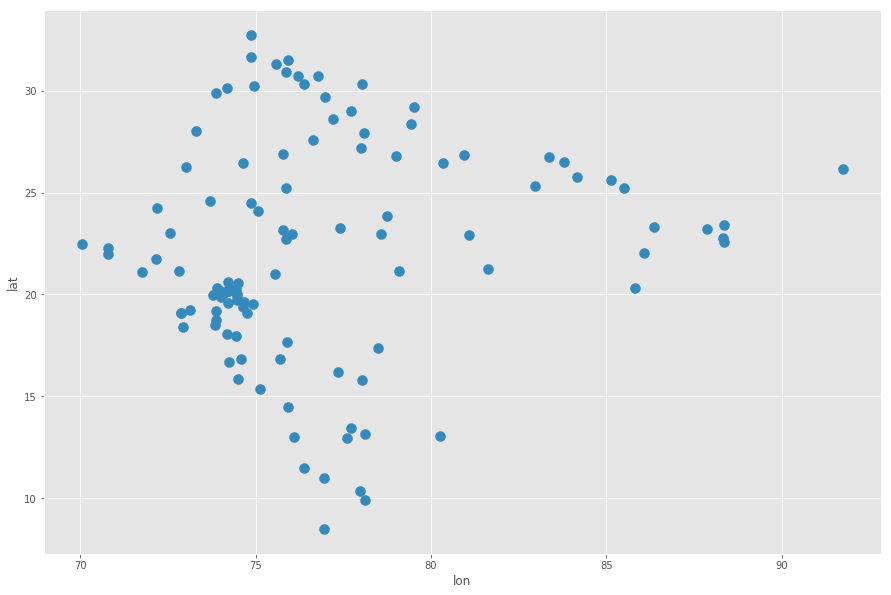

In [18]:
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = 100)

We can do a crude aspect ratio adjustment to make the cartesian coordinate systesm appear like a mercator map

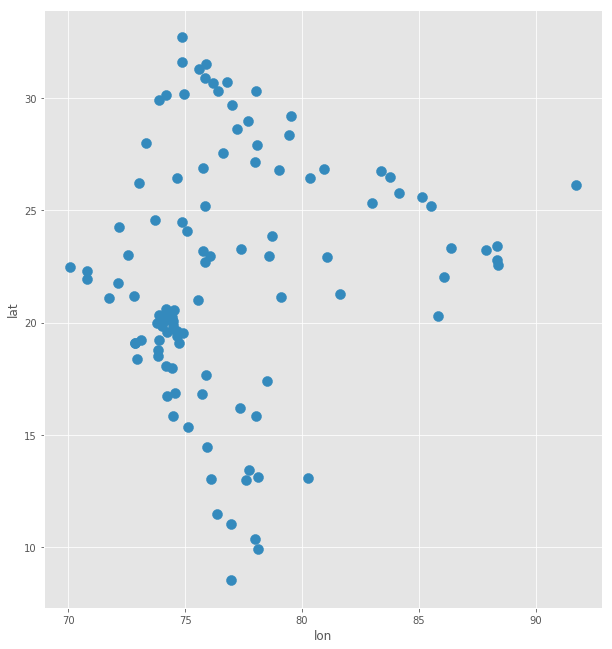

In [19]:
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = 100, figsize = [10,11])

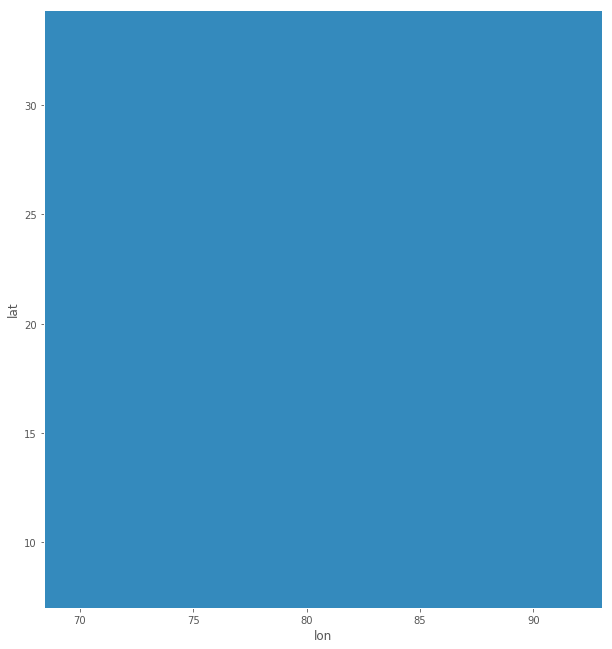

In [20]:
# Let us at quanitity as the size of the bubble
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat',
               s = dfCityGeo.quantity, figsize = [10,11])

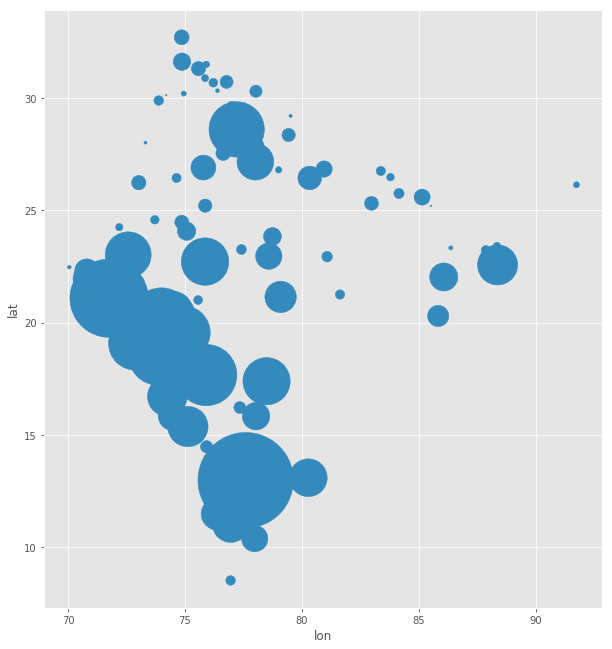

In [21]:
# Let us scale down the quantity variable
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', 
               s = dfCityGeo.quantity/1000, figsize = [10,11])

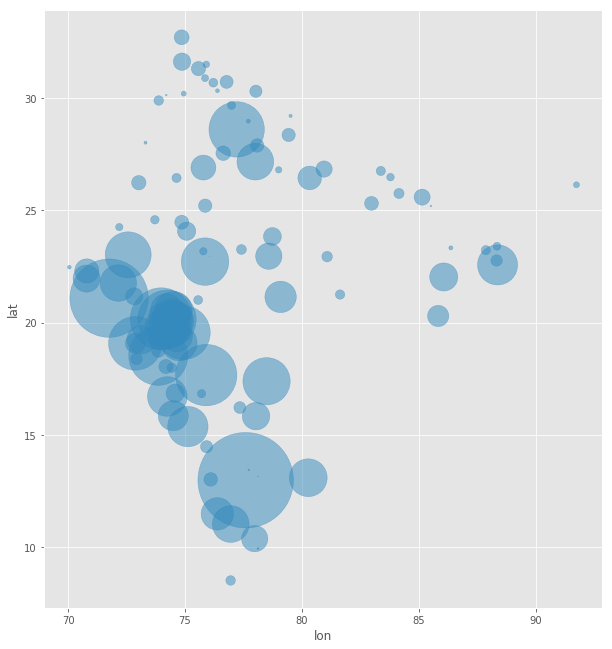

In [22]:
# Reduce the opacity of the color, so that we can see overlapping values
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = dfCityGeo.quantity/1000,
               alpha = 0.5, figsize = [10,11])

### Exercise

Can you plot all the States by quantity in (pseudo) geographic map?

## Plotting on a Map

In [23]:
import folium

In [24]:
# Getting an India Map
map_osm = folium.Map(location=[20.5937, 78.9629])

In [25]:
map_osm

In [27]:
# Using any map provider
map_stamen = folium.Map(location=[20.5937, 78.9629],
                       tiles='Stamen Toner', zoom_start=5)
map_stamen

Adding markers on the map

In [28]:
folium.CircleMarker(location=[20.5937, 78.9629],
                    radius=50000,
                    popup='Central India',
                    color='#3186cc',
                    fill_color='#3186cc',
                   ).add_to(map_stamen)
map_stamen

Add markers from a dataframe

In [29]:
length = dfCityGeo.shape[0]

In [30]:
length

166

In [31]:
map_india = folium.Map(location=[20.5937, 78.9629], tiles='Stamen Toner', zoom_start=5)

In [32]:
for i in range(length):
    lon = dfCityGeo.iloc[i, 2]
    lat = dfCityGeo.iloc[i, 3]
    location = [lat, lon]
    radius = dfCityGeo.iloc[i, 1]/25
    name = dfCityGeo.iloc[i,0]
    
    folium.CircleMarker(location=location, radius=radius,
                    popup=name, color='#3186cc', fill_color='#3186cc',
                   ).add_to(map_india)    

In [33]:
map_india

### Exercise

Can you plot all the States by quantity on an actual geographic map?